# K-mean

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit(['Male', 'Female']).transform(df.Gender)

In [7]:
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(["CustomerID"],axis='columns',inplace=True)

In [10]:
correlation = df.corr()

correlation

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

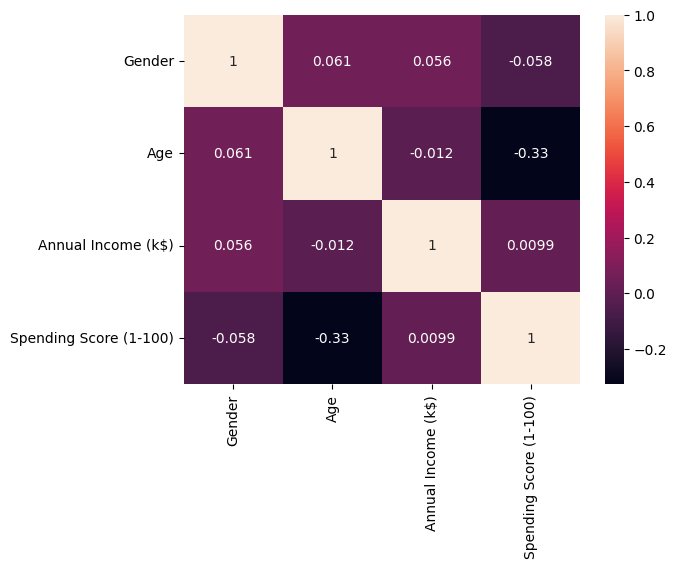

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


Elbow method

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmean_model = KMeans(n_clusters=7,init='random')
kmean_model.fit(X)
cp= kmean_model.cluster_centers_
print(kmean_model.inertia_)

NameError: name 'X' is not defined

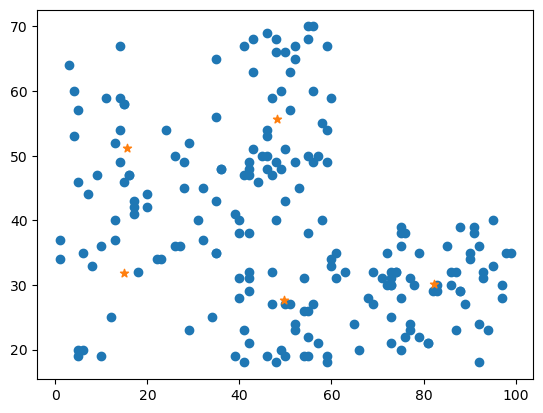

In [ ]:
plt.scatter(X["Spending Score (1-100)"],X["Age"])
plt.scatter(cp[:,0],cp[:,1],marker='*')

In [ ]:
X =df[["Spending Score (1-100)","Age"]]

In [ ]:
Clustering_score= []
for i in range(1,11):
    kmean_model= KMeans(n_clusters =i, init= 'random', random_state=42) #  'k-means++' initialization
    kmean_model.fit(X)
    Clustering_score.append(kmean_model.inertia_)





c:\Users\Yahia\.conda\envs\scipyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yahia\.conda\envs\scipyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yahia\.conda\envs\scipyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yahia\.conda\envs\scipyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [ ]:
print(Clustering_score)

[171535.5, 75949.15601023019, 45840.67661610867, 28165.58356662934, 23839.26248334166, 19577.258914820988, 15514.193134351028, 13024.10165341645, 11823.563139557704, 10336.20178062678]


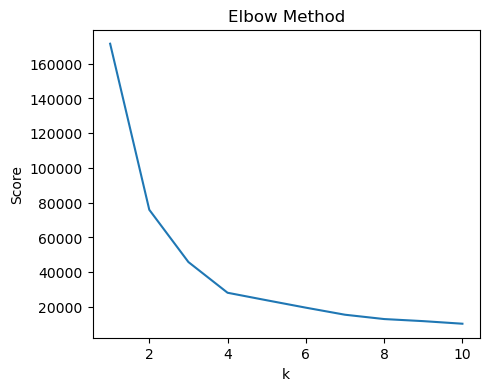

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),Clustering_score)
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

Text(0, 0.5, 'Clustering Score')

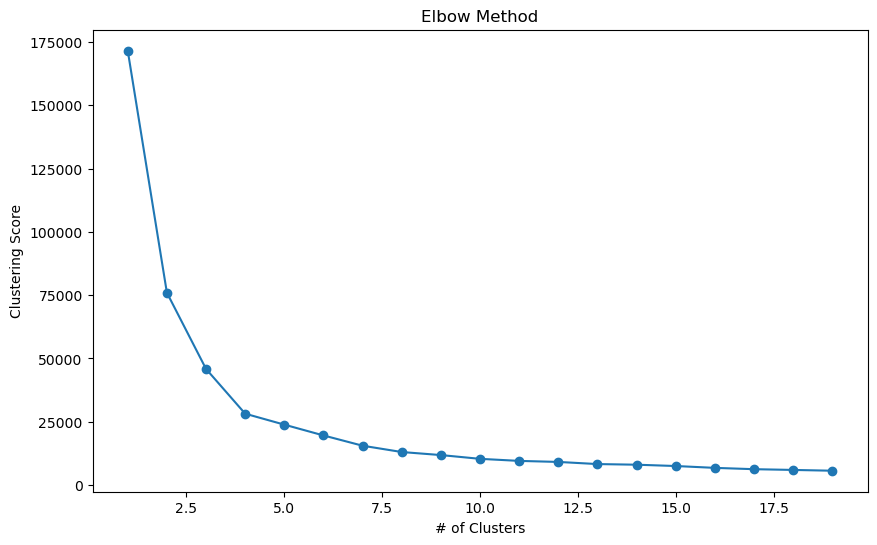

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),Clustering_score)
plt.scatter(range(1,20),Clustering_score)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Clustering Score')



In [ ]:
kmean_model =KMeans(n_clusters = 3, init='random', random_state=42)
kmean_model.fit(X)
kmean_model.inertia_

c:\Users\Yahia\.conda\envs\scipyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


45840.67661610867

Visualization

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaler =StandardScaler()
df_scaler.fit(df)
df_scaled= df_scaler.transform(df)

In [ ]:
type(df_scaled)

numpy.ndarray

In [ ]:
df_scaled_pd =pd.DataFrame(df_scaled,columns=df.columns)
df_scaled_pd

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_scaler =MinMaxScaler()
df_scaler.fit(df)
df_scaled= df_scaler.transform(df)

In [ ]:
df_scaled_pd =pd.DataFrame(df_scaled,columns=df.columns)
df_scaled_pd

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469
